# **Installing and importing the necessary libraries**

In [ ]:
!pip install pandas torch transformers scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("instagram_english_reviews_sentiment.csv")
df.drop(columns = 'Unnamed: 0', inplace=True)
df

,content,score,sentiment
0,Great app for social media,1,Positive
1,Unable to log in An unexpected error occurred....,4,Negative
2,Please growth my channel,5,Positive
3,The bast app,5,Neutral
4,This is my favourite app,5,Neutral
...,...,...,...
55878,Its not cool tho,4,Negative
55879,not grow my post fastly,3,Neutral
55880,Instagram is the new Lifestyle exposure,5,Neutral
55881,this app very good,5,Positive


In [ ]:
df = df.drop_duplicates(ignore_index=True)
df

,content,score,sentiment
0,Great app for social media,1,Positive
1,Unable to log in An unexpected error occurred....,4,Negative
2,Please growth my channel,5,Positive
3,The bast app,5,Neutral
4,This is my favourite app,5,Neutral
...,...,...,...
55878,Its not cool tho,4,Negative
55879,not grow my post fastly,3,Neutral
55880,Instagram is the new Lifestyle exposure,5,Neutral
55881,this app very good,5,Positive


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(55883, 3)

In [ ]:
df.dtypes

,0
content,object
score,int64
sentiment,object


In [ ]:
df.isna().sum()

,0
content,0
score,0
sentiment,0


In [ ]:
df.describe()

,score
count,55883.000000
mean,3.421917
std,1.761463
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


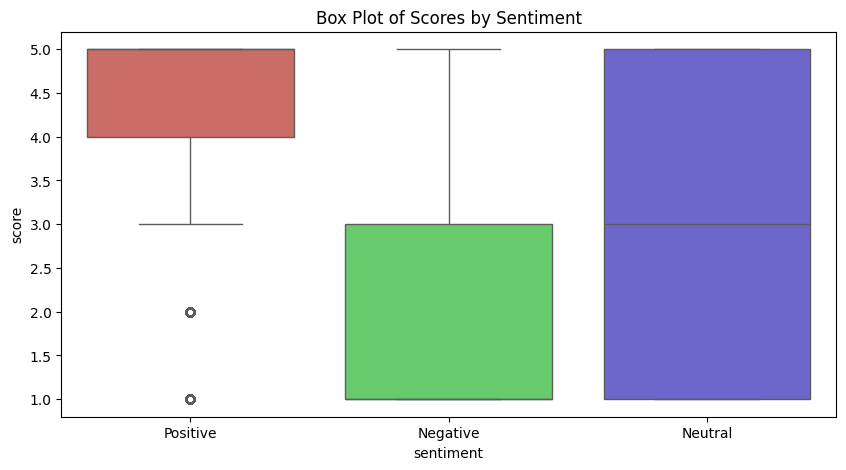

In [ ]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='score', data=df, palette = 'hls')
plt.title('Box Plot of Scores by Sentiment')
plt.show()

# **Data Visualization**

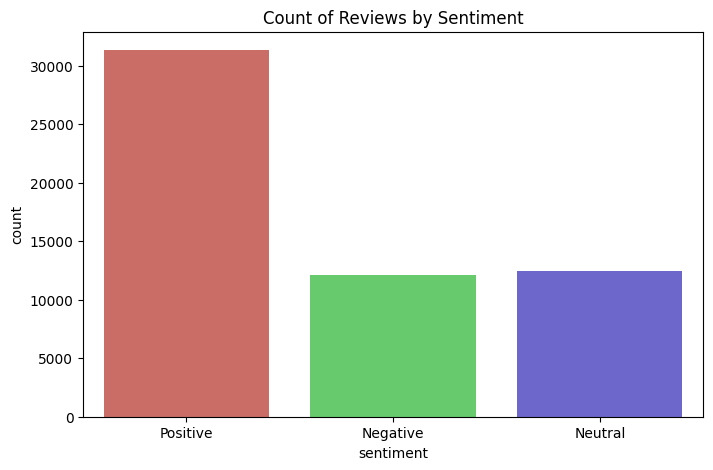

In [ ]:
# Sentiment Count
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette = 'hls')
plt.title('Count of Reviews by Sentiment')
plt.show()

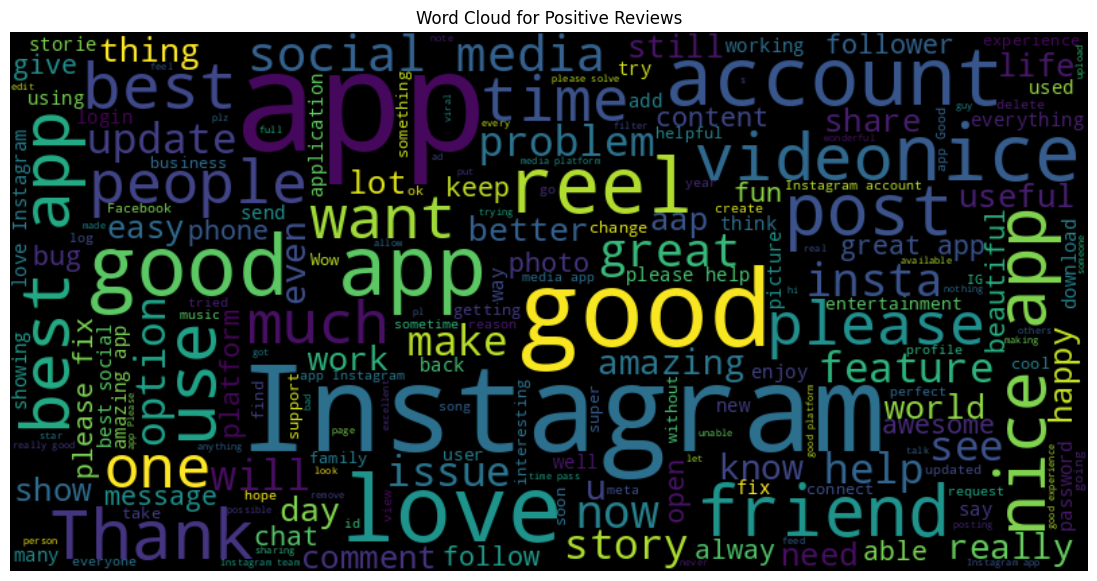

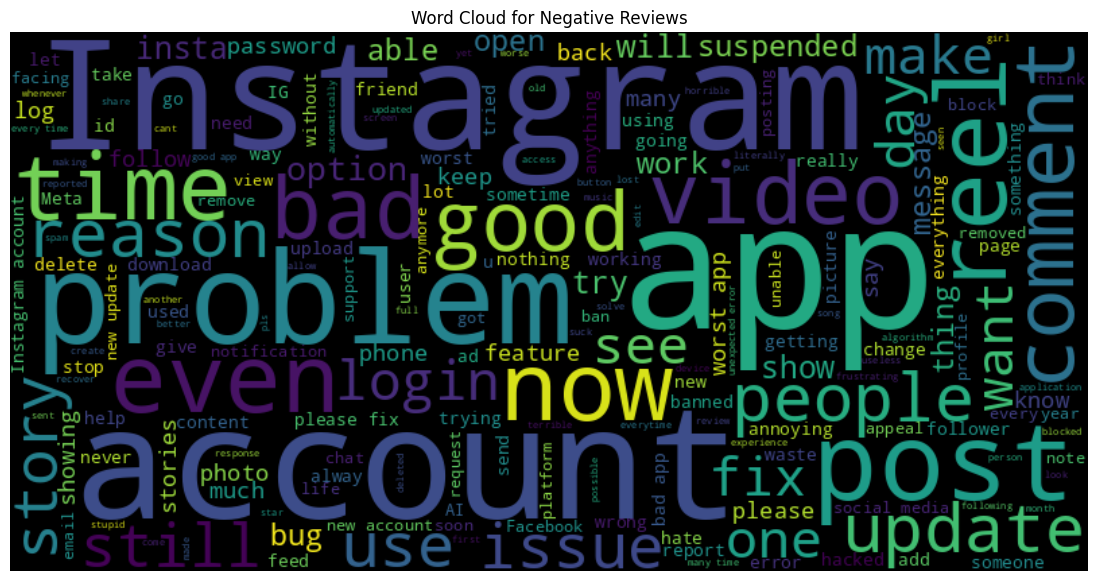

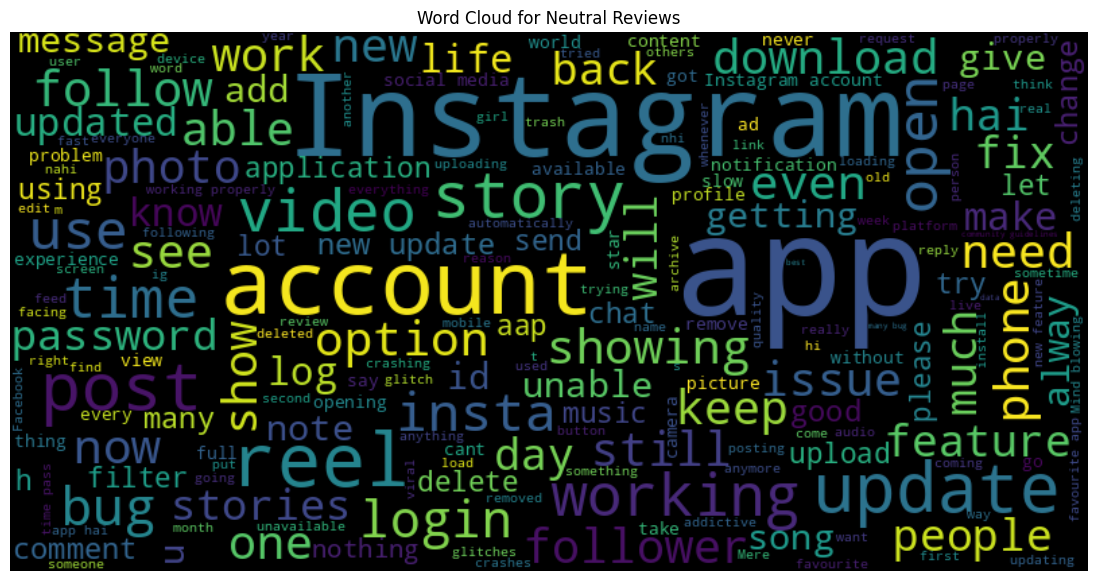

In [ ]:
# Word Cloud for Sentiments
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

#       

## **Model Building**

**ALBERT** (A Lite BERT) is a variant of the **BERT** (Bidirectional Encoder Representations from Transformers) model, designed to improve both efficiency and performance in natural language processing tasks. Here are some key features of ALBERT:

1. **Parameter Sharing**: ALBERT uses parameter sharing across layers, which significantly reduces the number of parameters compared to the original BERT, making it more memory-efficient.

2. **Factorized Embedding Parameterization**: This technique separates the size of the hidden layers from the size of the vocabulary embeddings, allowing for a smaller model with similar performance.

3. **Cross-layer Parameter Sharing**: By sharing parameters across different transformer layers, ALBERT minimizes the model size while retaining the ability to learn complex representations.

4. **Improved Training Techniques**: ALBERT incorporates additional training strategies, such as the use of a masked language model and sentence order prediction, enhancing its ability to understand context.

Overall, ALBERT achieves state-of-the-art performance on several NLP benchmarks while being more efficient than its predecessor, making it suitable for a variety of applications.

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score

# Preprocess the data
data = df[['content', 'sentiment']]
data['sentiment'] = data['sentiment'].astype(str)
data

,content,sentiment
0,Great app for social media,Positive
1,Unable to log in An unexpected error occurred....,Negative
2,Please growth my channel,Positive
3,The bast app,Neutral
4,This is my favourite app,Neutral
...,...,...
55878,Its not cool tho,Negative
55879,not grow my post fastly,Neutral
55880,Instagram is the new Lifestyle exposure,Neutral
55881,this app very good,Positive


### **Mapping Sentiment Labels to Integers**

In [ ]:
# Define the mapping for sentiment labels
sentiment_mapping = {
    'Positive': 2,
    'Neutral': 1,
    'Negative': 0
}

# Map the sentiment labels to integers
data['label'] = data['sentiment'].map(sentiment_mapping)
data

,content,sentiment,label
0,Great app for social media,Positive,2
1,Unable to log in An unexpected error occurred....,Negative,0
2,Please growth my channel,Positive,2
3,The bast app,Neutral,1
4,This is my favourite app,Neutral,1
...,...,...,...
55878,Its not cool tho,Negative,0
55879,not grow my post fastly,Neutral,1
55880,Instagram is the new Lifestyle exposure,Neutral,1
55881,this app very good,Positive,2


## **Data Partition (80:20)**

In [ ]:
# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['content'].values, data['label'].values, test_size=0.2, random_state=42
)

print(train_texts)
print(train_labels)
print(val_texts)
print(val_labels)

['My instagram is not opening pls solve the problem fast'
 'I love it so much 🎀'
 "Got my acc stolen and I can't make a new one it just shows error try refreshing page"
 ... 'First' 'worst app...My Facebook Account suspend kar dia'
 "My Instagram account is suspended I don't know how it is suspended but I have not make any mistake so plz recover my account from 2 months it is suspended I am facing so much problem because of it . And my WhatsApp account is also blocked at the same time when Instagram account was suspended. It's my humble request to instgram, whatsapp and META to plz recover my account plz sir/mam. Instagram I'd = sankettt_61 Plz sir it's my humble request plz sir . 🙏"]
[0 2 0 ... 1 0 0]
['Good app 😇😇' 'It sucks. They want to censor free speech.'
 "I am not getting my OTP code to log in my account, I have forgotten my password. I think it's a bug, please fix it"
 ... 'My account keeps getting suspended when I didn’t do anything 😪'
 'Flagging innocent videos and emojis wh

### **Loading the ALBERT Tokenizer and Model for Sequence Classification**

In [ ]:
# Load the ALBERT tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=len(label_encoder.classes_))

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **Tokenizing Texts for Training and Validation**

In [ ]:
# Tokenize the texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=512)

### **Defining a PyTorch Dataset Class for Review Encodings and Labels**

In [ ]:
# Create PyTorch datasets
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

### **Creating PyTorch Datasets for Training and Validation**

In [ ]:
train_dataset = ReviewsDataset(train_encodings, train_labels)
val_dataset = ReviewsDataset(val_encodings, val_labels)

In [ ]:
train_dataset[0]

{'input_ids': tensor([    2,    51, 28205,    25,    52,  1214, 12443,    18,  8402,    14,
          1448,  1512,     3,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [ ]:
# Define the compute_metrics function
def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # Get the predicted class
    return {'accuracy': accuracy_score(p.label_ids, preds)}

### **Configuring Training Arguments and Creating the Trainer**

In [ ]:
# Set up training arguments with evaluation every 1500 steps
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="steps",
    eval_steps=1500,
    save_steps=500,
    logging_steps=500,
)

# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # Pass the compute_metrics function
)

### **Model Training**

In [ ]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss,Accuracy
1500,0.393200,0.345999,0.890758
3000,0.309800,0.309292,0.913751
4500,0.247700,0.253495,0.920909
6000,0.185500,0.207674,0.940234
7500,0.161800,0.208056,0.946497


TrainOutput(global_step=8385, training_loss=0.2800500504659199, metrics={'train_runtime': 7910.2344, 'train_samples_per_second': 16.955, 'train_steps_per_second': 1.06, 'total_flos': 1621523347677828.0, 'train_loss': 0.2800500504659199, 'epoch': 3.0})

## **Evaluating the Model**

In [ ]:
# Evaluate the model
trainer.evaluate()

{'eval_loss': 0.20451980829238892,
 'eval_accuracy': 0.9487340073364946,
 'eval_runtime': 367.5934,
 'eval_samples_per_second': 30.406,
 'eval_steps_per_second': 1.902,
 'epoch': 3.0}

### **Saving the model**

In [ ]:
# Save the trained model and tokenizer
model.save_pretrained('./ALBERT_sentiment_model')
tokenizer.save_pretrained('./ALBERT_sentiment_model')

('./ALBERT_sentiment_model/tokenizer_config.json',
 './ALBERT_sentiment_model/special_tokens_map.json',
 './ALBERT_sentiment_model/spiece.model',
 './ALBERT_sentiment_model/added_tokens.json')

In [ ]:
!zip -r ALBERT_sentiment_model.zip ./ALBERT_sentiment_model

  adding: ALBERT_sentiment_model/ (stored 0%)
  adding: ALBERT_sentiment_model/model.safetensors (deflated 7%)
  adding: ALBERT_sentiment_model/spiece.model (deflated 49%)
  adding: ALBERT_sentiment_model/tokenizer_config.json (deflated 75%)
  adding: ALBERT_sentiment_model/config.json (deflated 54%)
  adding: ALBERT_sentiment_model/special_tokens_map.json (deflated 49%)


In [ ]:
from google.colab import files
files.download('ALBERT_sentiment_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>